In [13]:
# importiamo Pandas e il dataframe dal file data/wine.csv
import pandas as pd
df = pd.read_csv("data/wine.csv")

In [14]:
# visualizziamo il dataframe
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [15]:
# visualizziamo il numero di vini per ogni classe
print(df.groupby('Class').size())

Class
1    59
2    71
3    48
dtype: int64


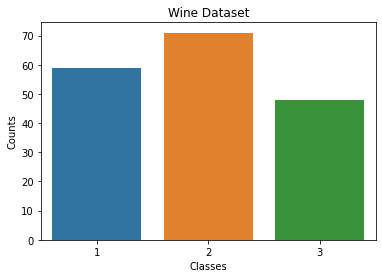

In [16]:
# per maggior chiarezza, visualizziamo anche il grafico delle classi dei vini
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x="Class", data=df)
plt.title("Wine Dataset")
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.show()

In [17]:
# traformiamo il dataframe in una matrice numpy e separiamo il target (la classe, prima colonna, che chiamiamo y)
# dal resto dei dati (le osservazioni, che chiameremo x)
import numpy as np
dfnp = df.to_numpy()
x=dfnp[:,1:] # prendiamo tutti i dati tranne l'ultima colonna -> variabili indipendenti, osservazioni
y=dfnp[:,0] # prendiamo solo l'ultima colonna -> variabile dipendente, target

In [18]:
# vediamo i dati presenti in x e y
np.set_printoptions(suppress=True)
print(x[:10])
print(f'y = {y[:10]}')

[[  14.23    1.71    2.43   15.6   127.      2.8     3.06    0.28    2.29
     5.64    1.04    3.92 1065.  ]
 [  13.2     1.78    2.14   11.2   100.      2.65    2.76    0.26    1.28
     4.38    1.05    3.4  1050.  ]
 [  13.16    2.36    2.67   18.6   101.      2.8     3.24    0.3     2.81
     5.68    1.03    3.17 1185.  ]
 [  14.37    1.95    2.5    16.8   113.      3.85    3.49    0.24    2.18
     7.8     0.86    3.45 1480.  ]
 [  13.24    2.59    2.87   21.    118.      2.8     2.69    0.39    1.82
     4.32    1.04    2.93  735.  ]
 [  14.2     1.76    2.45   15.2   112.      3.27    3.39    0.34    1.97
     6.75    1.05    2.85 1450.  ]
 [  14.39    1.87    2.45   14.6    96.      2.5     2.52    0.3     1.98
     5.25    1.02    3.58 1290.  ]
 [  14.06    2.15    2.61   17.6   121.      2.6     2.51    0.31    1.25
     5.05    1.06    3.58 1295.  ]
 [  14.83    1.64    2.17   14.     97.      2.8     2.98    0.29    1.98
     5.2     1.08    2.85 1045.  ]
 [  13.86    1.35  

In [19]:
# ora contiamo le classi che sono presenti nella y per vedere se corrispondono a quanto trovato nel dataframe
#Print class frequencies through collections counter
import collections
collections.Counter(y)

Counter({1.0: 59, 2.0: 71, 3.0: 48})

In [20]:
#suddividiamo ora i dati in due dataset, uno per 'allenare' il metodo (training set) 
# e l'altro per testarne l'efficacia (test set). Facciamo in modo che il training set sia il 70% del totale

from sklearn.model_selection import train_test_split # suddivide le osservazioni nei due insiemi

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.30, # by default is 75%-25%
                                                    # shuffle is set True by default,
                                                    stratify = y, # per mantenere le proporzioni che ci sono nei dati di partenza
                                                    random_state = 123) # fix random seed for replicability

In [21]:
# visualizziamo gli shape dei vari dataset X_train, X_test, y_train e y_test
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((124, 13), (124,), (54, 13), (54,))

In [22]:
# visualizziamo anche le prime 10 righe dell'X_train e dell'y_train per vedere i dati
# eliminiamo la dotazine scientifica per comodità di lettura
print(X_train[:10])
print(f'y_train = {y_train[:10]}')

[[  13.2     1.78    2.14   11.2   100.      2.65    2.76    0.26    1.28
     4.38    1.05    3.4  1050.  ]
 [  14.02    1.68    2.21   16.     96.      2.65    2.33    0.26    1.98
     4.7     1.04    3.59 1035.  ]
 [  13.23    3.3     2.28   18.5    98.      1.8     0.83    0.61    1.87
    10.52    0.56    1.51  675.  ]
 [  12.37    1.63    2.3    24.5    88.      2.22    2.45    0.4     1.9
     2.12    0.89    2.78  342.  ]
 [  14.12    1.48    2.32   16.8    95.      2.2     2.43    0.26    1.57
     5.      1.17    2.82 1280.  ]
 [  12.21    1.19    1.75   16.8   151.      1.85    1.28    0.14    2.5
     2.85    1.28    3.07  718.  ]
 [  12.96    3.45    2.35   18.5   106.      1.39    0.7     0.4     0.94
     5.28    0.68    1.75  675.  ]
 [  13.69    3.26    2.54   20.    107.      1.83    0.56    0.5     0.8
     5.88    0.96    1.82  680.  ]
 [  14.23    1.71    2.43   15.6   127.      2.8     3.06    0.28    2.29
     5.64    1.04    3.92 1065.  ]
 [  12.29    3.17    2

In [23]:
# importiamo il metodo che vogliamo utilizzara 
from sklearn import tree

# impostiamo i parametri del metodo
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=4, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
tree_clf.fit(X_train,y_train)

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
predict_tree = tree_clf.predict(X_test)

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict_tree[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [1. 1. 1. 2. 1. 1. 2. 2. 3. 2.]
dati reali presenti nel dataset di test = [1. 1. 1. 2. 1. 1. 1. 2. 3. 2.]


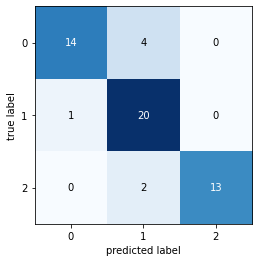

In [24]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict_tree))
plt.show()

In [25]:
print(classification_report(y_test, predict_tree))

              precision    recall  f1-score   support

         1.0       0.93      0.78      0.85        18
         2.0       0.77      0.95      0.85        21
         3.0       1.00      0.87      0.93        15

    accuracy                           0.87        54
   macro avg       0.90      0.87      0.88        54
weighted avg       0.89      0.87      0.87        54



In [26]:
# importiamo il metodo di classificazione K-NN
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5) # impostiamo l'unico parametro (il numero di vicini)
neigh.fit(X_train, y_train) # "alleniamo" il metodo con i dati del training set
predict_knn = neigh.predict(X_test) # proviamo a fare una previsione sui dati del test set

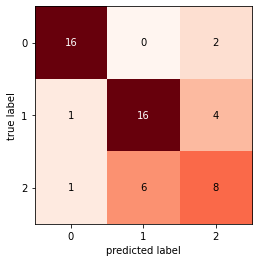

In [27]:
# valutiamo il nostro metodo:
7/10
# visualizziamo la confusion matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict_knn), cmap=plt.cm.Reds)
plt.show()

In [28]:
# visualizziamo adesso gli indicatori
print("K-NN", classification_report(y_test, predict_knn))
print("Decision Tree", classification_report(y_test, predict_tree))

K-NN               precision    recall  f1-score   support

         1.0       0.89      0.89      0.89        18
         2.0       0.73      0.76      0.74        21
         3.0       0.57      0.53      0.55        15

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54

Decision Tree               precision    recall  f1-score   support

         1.0       0.93      0.78      0.85        18
         2.0       0.77      0.95      0.85        21
         3.0       1.00      0.87      0.93        15

    accuracy                           0.87        54
   macro avg       0.90      0.87      0.88        54
weighted avg       0.89      0.87      0.87        54



In [44]:
k = int(input("insert max K:"))
y = [0,0]
for i in range(1,k+1,2):
    neigh = KNeighborsClassifier(n_neighbors=i) # impostiamo l'unico parametro (il numero di vicini)
    neigh.fit(X_train, y_train) # "alleniamo" il metodo con i dati del training set
    predict_knn = neigh.predict(X_test) # proviamo a fare una previsione sui dati del test set
    x = [i, float(classification_report(y_test, predict_knn, output_dict=True).get("accuracy"))]
    if (x[1] > y[1]):
        y = x
    else:
        pass
print(f'{y[0]} => {y[1]}')

1 => 0.7777777777777778
